Project Description :
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [192]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [193]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [194]:
df.shape

(1599, 12)

In [195]:
print(f"the rows and columns in the dataset:{df.shape}")
print(f"\n the column headers in the datset:{df.columns}")

the rows and columns in the dataset:(1599, 12)

 the column headers in the datset:Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


This dataset contains 1599 rows and 12 columns with 1 target variable and 11 independent variables

In [196]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

This dataset contains two types of data:float64 and int64

In [197]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in the dataset

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

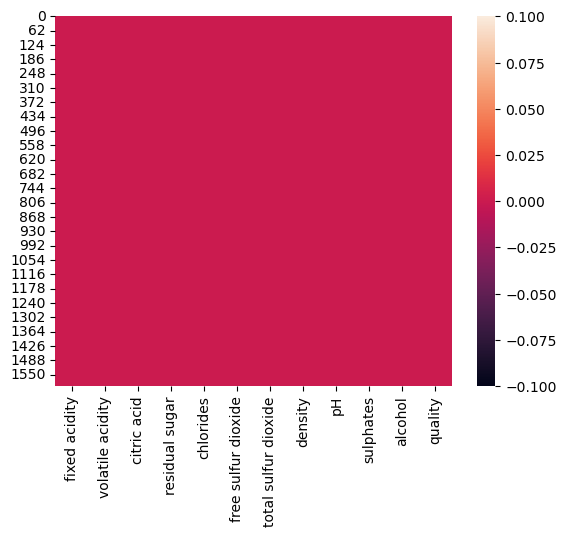

In [199]:
sns.heatmap(df.isnull())

There is no missing data present in the dataset

In [200]:
df.nunique().to_frame("No of unique values")

,No of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [201]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [202]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


since count is same for all the columns so there are no null values present in our dataset
The mean is greater than median(50%)for fixed acidity,volatile acidity,citric acid,residula sugar,chlorides,pH,sulphates,alcohol so data is skewed to right for these columns
The mean is less than median(50%) for density,quality so data is skewed to left for these two columns
There is a big differnce between 75% and max values of fixed acidity,residual sugar, total sulfur dioxide,this indicates outliers present in the dataset 

<Axes: xlabel='quality', ylabel='fixed acidity'>

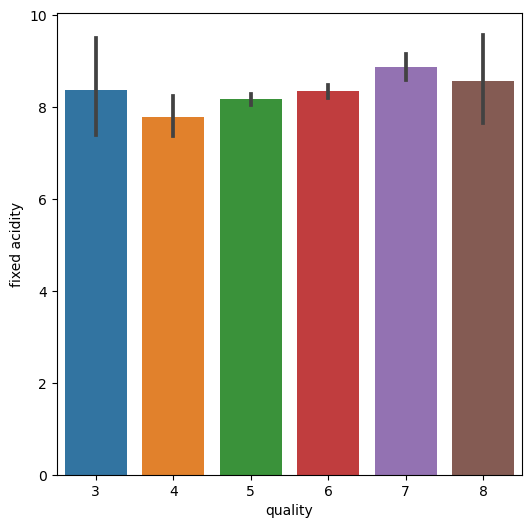

In [203]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='fixed acidity',data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

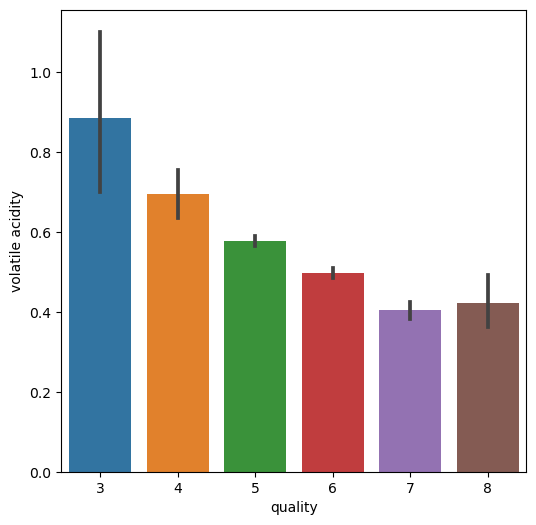

In [204]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

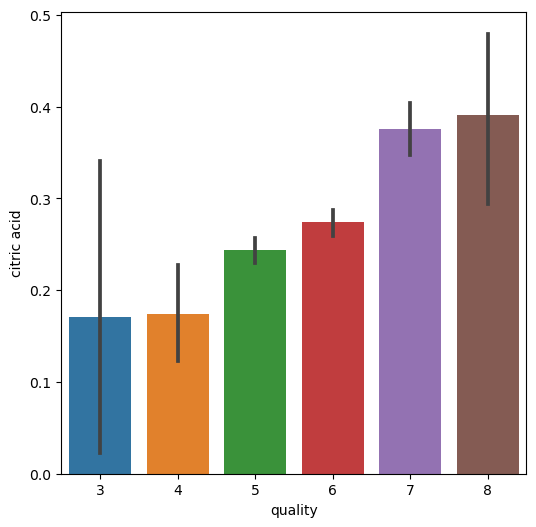

In [205]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

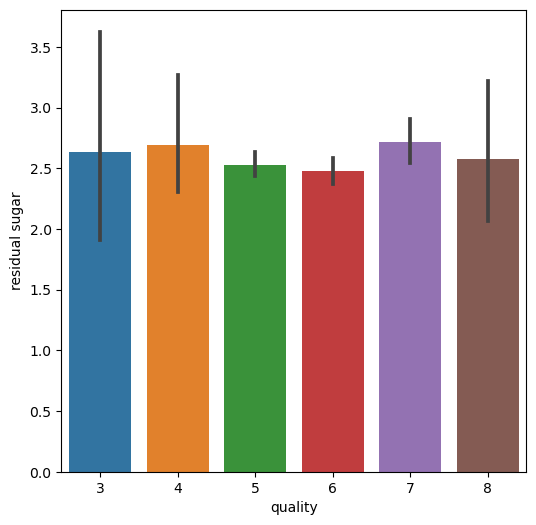

In [206]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

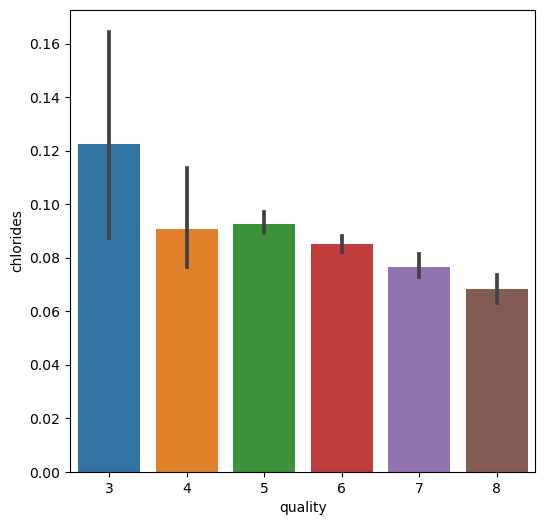

In [207]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

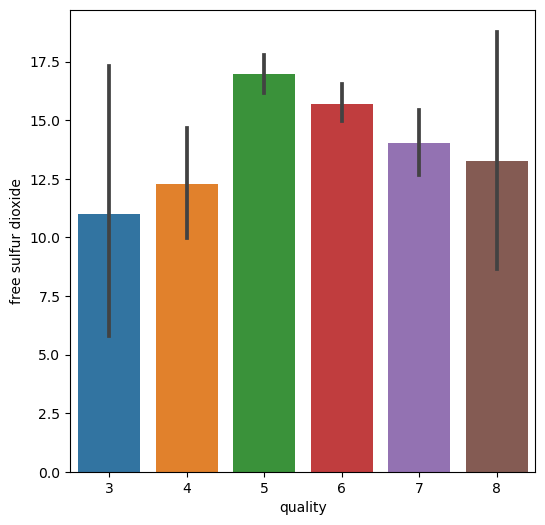

In [208]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

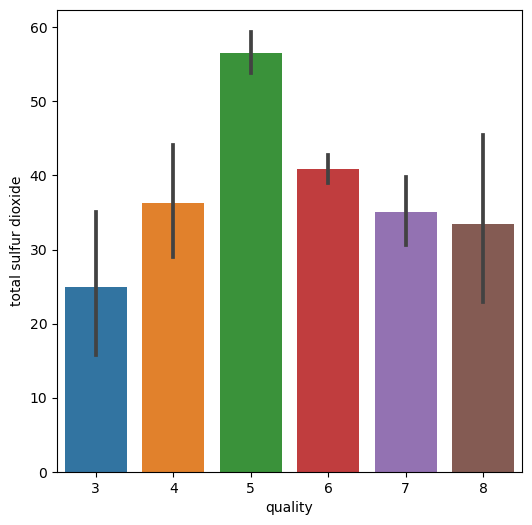

In [209]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='density'>

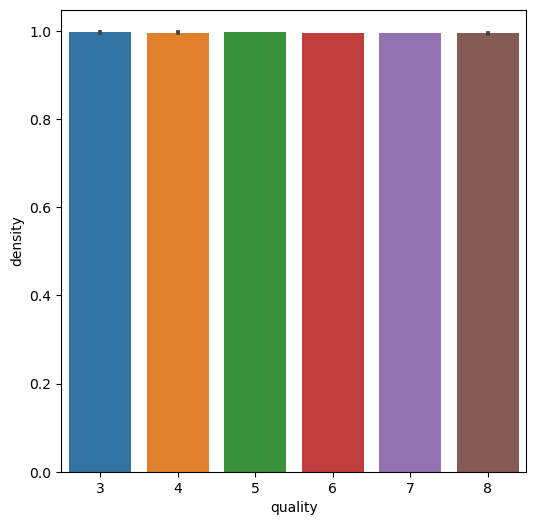

In [210]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='density',data=df)

<Axes: xlabel='quality', ylabel='pH'>

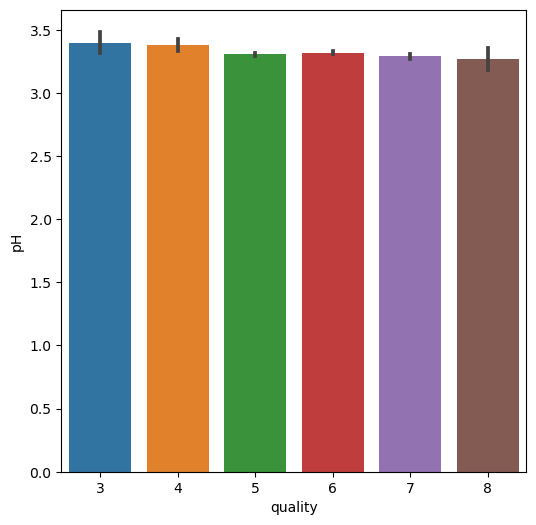

In [211]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='pH',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

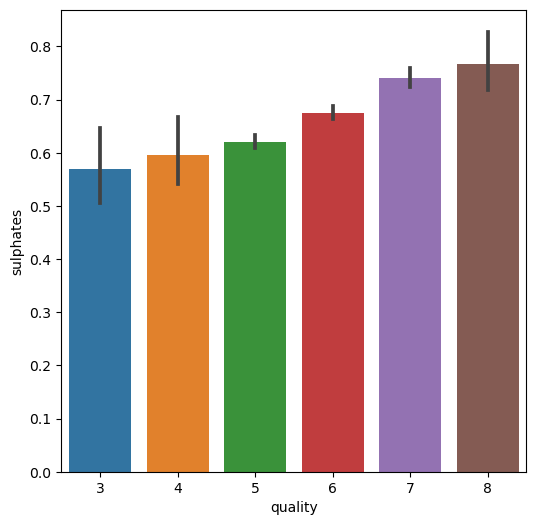

In [212]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

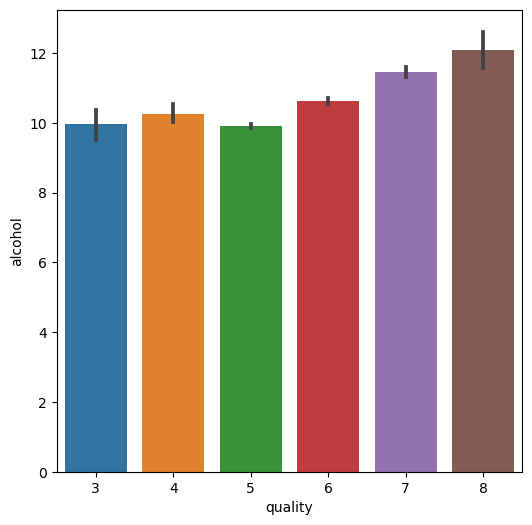

In [213]:
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='alcohol',data=df)

From the above plots we observe: 1.There is no fixed pattern for fixed acidity,free sulfur dioxide, total sulfur dioxide and residual sugar 2.There is an increasing trend for citric acid,sulphates and alcohol 3.There is downward trend for volatile acidity chlorides and a slight downward trend for pH 4.There is no pattern for density as all the values seems same

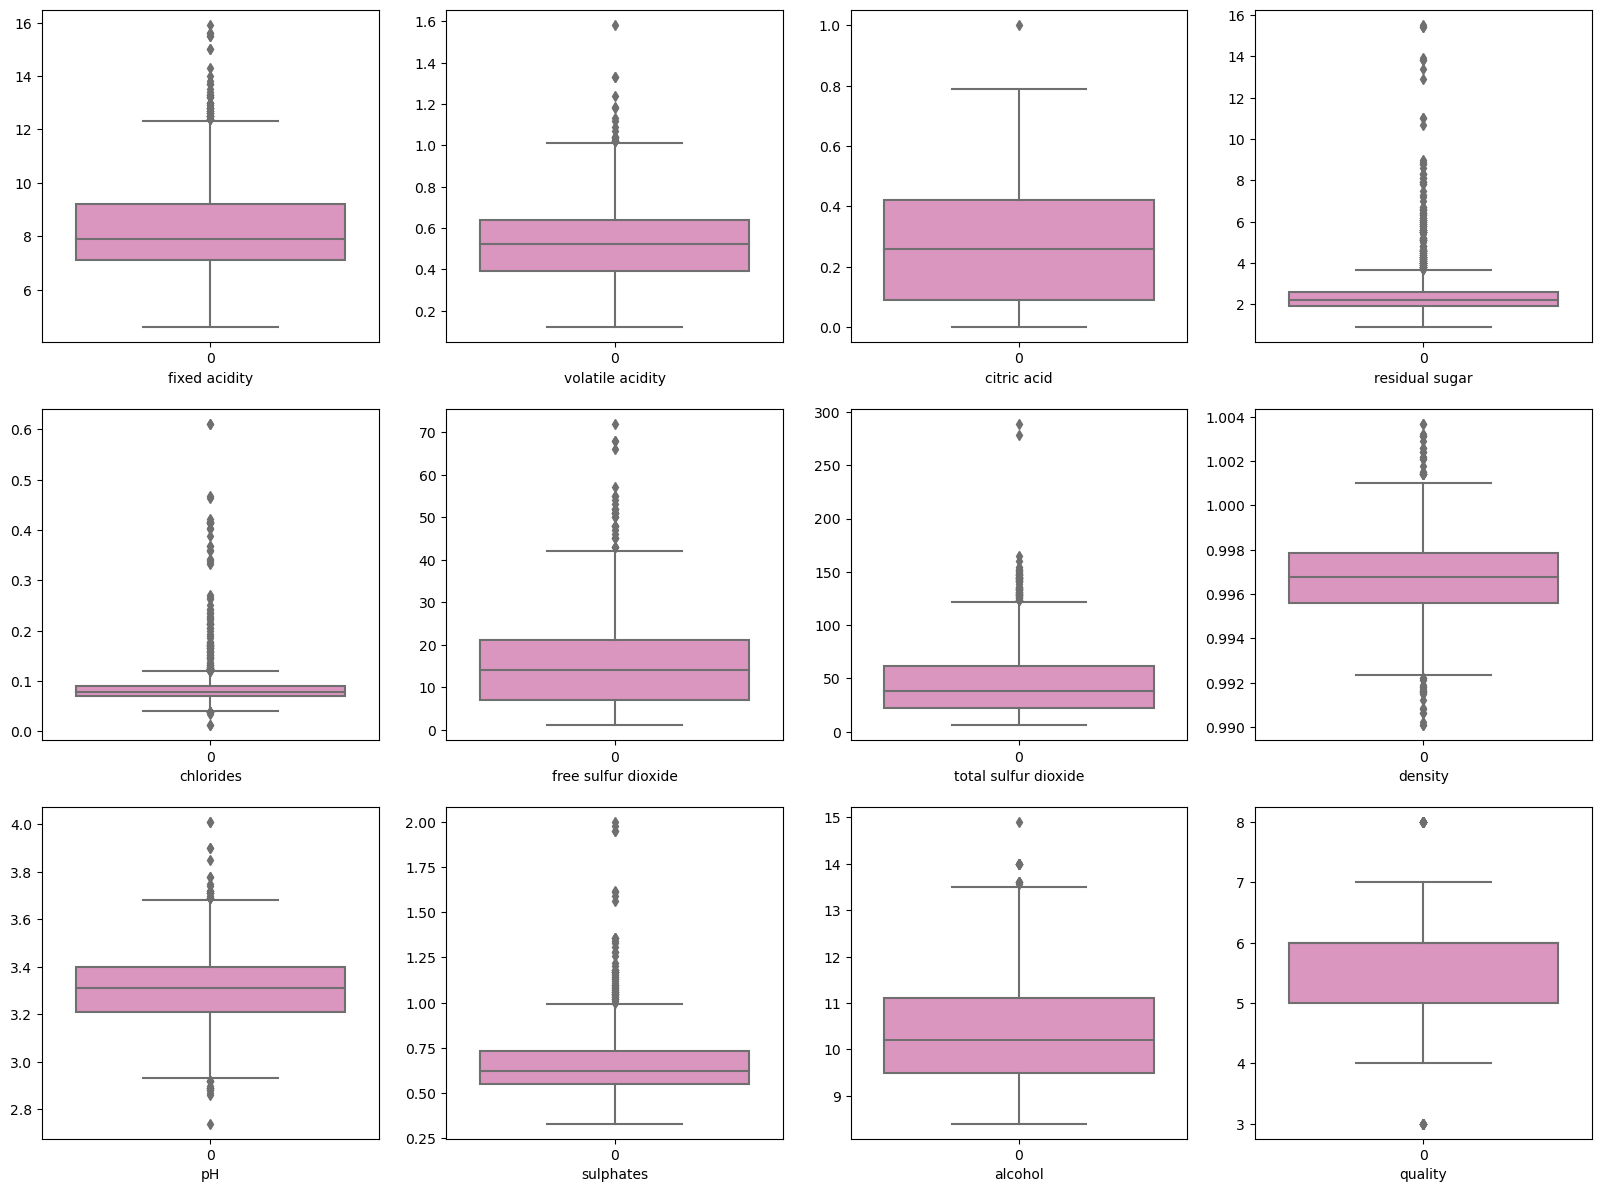

In [214]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

From the above plot we see Outliers present in the data which will be removed later

In [219]:
# checking correlation 
cor=df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Columns fixed acidity and density are positively correlated with a value of 0.668 close to 1
Columns free sulfur dioxide and total sulfur dioxide are positively correlated with a value of 0.667 which is close to the value 1
Columns fixed acidity and citric acid are positively correlated with a value of 0.671 close to 1
The negatively correlated columns that are fixed acitidy and pH with a value -0.682 being close to the value -1.
so we observe multicollinearity in the data.

In [220]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We can see positive and negative correlated features with the target

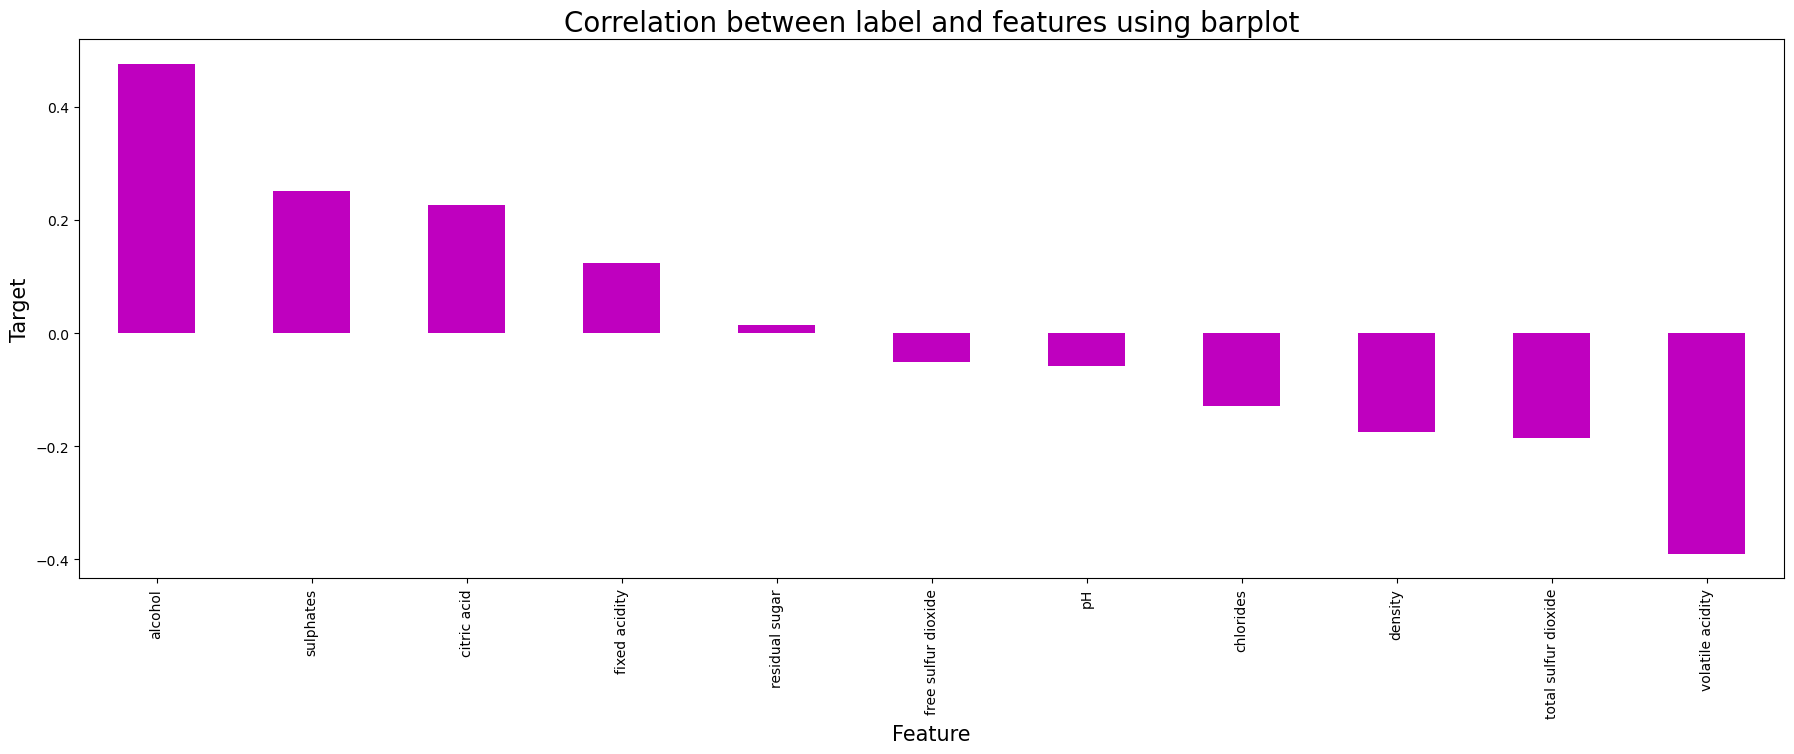

In [222]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above plot it is very clear that residual sugar is very less correlated with the target and alcohol,sulphates and citric acid plays major role in determining a good quality wine

In [223]:
# removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [224]:
df.shape

(1451, 12)

In [225]:
data_loss=(1599-1451)/1599*100 
data_loss

9.255784865540964

In [226]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [227]:
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [228]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [229]:
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

I have used oversampling method to make sure that the values in the target variable remains the same so that our system doesnot get biased with certain features

In [141]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

using above technique i have divided my target variable in two categories
1. value in target >7 good quality wine represents 1
2. value in target <7 bad quality wine represents 0

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.702839,1.046604,-1.491588,-0.645374,-0.143751,-0.261584,-0.090429,0.802524,1.504307,-0.792295,-1.258329
1,-0.451844,2.061774,-1.491588,0.128217,1.100145,1.276854,1.175307,0.194539,-0.706123,0.105004,-0.892629
2,-0.451844,1.384994,-1.290442,-0.203322,0.760901,0.177970,0.676684,0.316136,-0.278298,-0.119321,-0.892629
3,1.681611,-1.322124,1.324468,-0.645374,-0.200292,0.397747,0.906818,0.924121,-0.991340,-0.642746,-0.892629
4,-0.702839,1.046604,-1.491588,-0.645374,-0.143751,-0.261584,-0.090429,0.802524,1.504307,-0.792295,-1.258329
...,...,...,...,...,...,...,...,...,...,...,...
3080,1.279234,-1.003696,1.349693,-0.397385,-0.711882,-0.437177,-0.282207,0.435011,-2.044479,0.982259,-0.374235
3081,0.298465,-0.621823,0.907400,-0.755887,-0.461826,-0.724053,-0.812824,-1.062406,-0.426655,0.179779,1.423334
3082,1.429272,0.429643,1.655906,2.568439,0.213914,-0.689901,-0.618788,1.106704,-0.554782,0.243884,2.163538
3083,1.442728,0.138819,1.737675,2.330523,0.335828,-0.811027,-0.685172,1.041342,-0.689794,0.614892,2.005460


In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,7.881965,fixed acidity
1,2.324838,volatile acidity
2,4.447364,citric acid
3,1.777266,residual sugar
4,1.209226,chlorides
5,2.172093,free sulfur dioxide
6,2.395595,total sulfur dioxide
7,6.428202,density
8,3.742843,pH
9,1.513759,sulphates


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [149]:
maxAccu=0
maxRS=0
for i in range (1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    pred=RFC.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.9654427645788337 on Random_state  126


In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxRS)

In [153]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC=RFC.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predRFC))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predRFC))
print("Classification Report is : ",classification_report(Y_test,predRFC))

Accuracy Score is :  0.9756888168557536
Confusion Matrix is :  [[372   9]
 [  6 230]]
Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.98      0.98       381
           1       0.96      0.97      0.97       236

    accuracy                           0.98       617
   macro avg       0.97      0.98      0.97       617
weighted avg       0.98      0.98      0.98       617



In [157]:
svm=SVC()
svm.fit(X_train,Y_train)
predsvm=svm.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predsvm))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predsvm))
print("Classification Report is : ",classification_report(Y_test,predsvm))

Accuracy Score is :  0.9286871961102107
Confusion Matrix is :  [[357  24]
 [ 20 216]]
Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.94      0.94       381
           1       0.90      0.92      0.91       236

    accuracy                           0.93       617
   macro avg       0.92      0.93      0.92       617
weighted avg       0.93      0.93      0.93       617



In [160]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
predGBC=GBC.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predGBC))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predGBC))
print("Classification Report is : ",classification_report(Y_test,predGBC))

Accuracy Score is :  0.940032414910859
Confusion Matrix is :  [[359  22]
 [ 15 221]]
Classification Report is :                precision    recall  f1-score   support

           0       0.96      0.94      0.95       381
           1       0.91      0.94      0.92       236

    accuracy                           0.94       617
   macro avg       0.93      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



In [161]:
ADA=AdaBoostClassifier()
ADA.fit(X_train,Y_train)
predADA=ADA.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predADA))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predADA))
print("Classification Report is : ",classification_report(Y_test,predADA))

Accuracy Score is :  0.9189627228525121
Confusion Matrix is :  [[351  30]
 [ 20 216]]
Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.92      0.93       381
           1       0.88      0.92      0.90       236

    accuracy                           0.92       617
   macro avg       0.91      0.92      0.91       617
weighted avg       0.92      0.92      0.92       617



In [162]:
BG=BaggingClassifier()
BG.fit(X_train,Y_train)
predBG=BG.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predBG))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predBG))
print("Classification Report is : ",classification_report(Y_test,predBG))

Accuracy Score is :  0.9611021069692058
Confusion Matrix is :  [[366  15]
 [  9 227]]
Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.96      0.97       381
           1       0.94      0.96      0.95       236

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



In [164]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,Y_train)
predETC=ETC.predict(X_test)
print("Accuracy Score is : ",accuracy_score(Y_test,predETC))
print("Confusion Matrix is : ",confusion_matrix(Y_test,predETC))
print("Classification Report is : ",classification_report(Y_test,predETC))

Accuracy Score is :  0.9627228525121556
Confusion Matrix is :  [[366  15]
 [  8 228]]
Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.96      0.97       381
           1       0.94      0.97      0.95       236

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



In [165]:
score=cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predRFC)-score.mean())*100)

[0.89789303 0.90113452 0.8719611  0.98055105 0.99351702]
0.9290113452188006
Difference between Accuracy score and cross validation score is:  3.857374392220425


In [166]:
score1=cross_val_score(svm,X,Y)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predsvm)-score1.mean())*100)

[0.85575365 0.86547812 0.84440843 0.96758509 0.98379254]
0.9034035656401945
Difference between Accuracy score and cross validation score is:  2.528363047001614


In [168]:
score2=cross_val_score(GBC,X,Y)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predGBC)-score2.mean())*100)

[0.8541329  0.86871961 0.86061588 0.97082658 0.98541329]
0.9079416531604538
Difference between Accuracy score and cross validation score is:  3.209076175040515


In [169]:
score3=cross_val_score(ADA,X,Y)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predADA)-score3.mean())*100)

[0.78606159 0.84278768 0.82009724 0.92382496 0.95786062]
0.8661264181523501
Difference between Accuracy score and cross validation score is:  5.283630470016199


In [170]:
score4=cross_val_score(BG,X,Y)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predBG)-score4.mean())*100)

[0.87358185 0.88006483 0.8719611  0.96920583 0.98541329]
0.9160453808752026
Difference between Accuracy score and cross validation score is:  4.5056726094003245


In [171]:
score5=cross_val_score(ETC,X,Y)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is: ",(accuracy_score(Y_test,predETC)-score5.mean())*100)

[0.91572123 0.91410049 0.8719611  0.98379254 0.99513776]
0.9361426256077797
Difference between Accuracy score and cross validation score is:  2.658022690437589


SVC is our best model as the difference between Accuracy score and cross validation score is least for this classifier

In [177]:
param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [178]:
gscv=GridSearchCV(SVC(),param,cv=7)
gscv.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [181]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [183]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.86871961102106


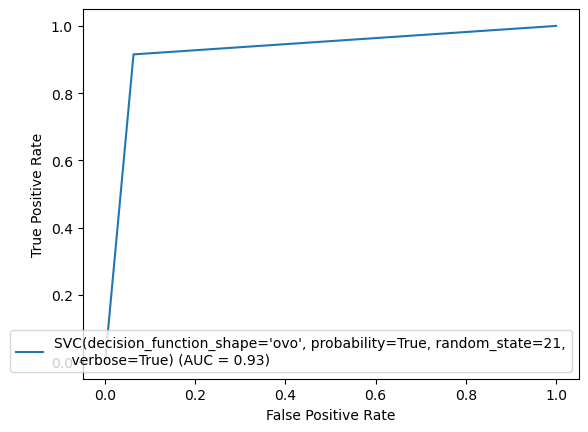

In [184]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,fmod_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_Model)
display.plot()

In [185]:
import joblib
joblib.dump(Final_Model, "Redwine_Quality_Prediction_Analysis.pkl")

['Redwine_Quality_Prediction_Analysis.pkl']

In [186]:
model = joblib.load("Redwine_Quality_Prediction_Analysis.pkl")
prediction=Final_Model.predict(X_test)
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [187]:
a=np.array(Y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
612,1,1
613,0,0
614,1,1
615,0,0


In [190]:
conclusion=pd.DataFrame([Final_Model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
Predicted,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,1,1,0,1,0,0
Original,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
